C:\Users\anian\AppData\Local\Temp/ipykernel_20096/889257999.py:17: RuntimeWarning: overflow encountered in int_scalars
  f=30*np.power(10,8)



dystans =  3 m
d1 = 3 m  || d2 = 5.0 m  || d3 = 36.124784 m
t1 = 1e-08 s  || t2 = 1.66666667e-08 s  || t3 = 1.204159467e-07 s
t~1 = 0.0 s  || t~2 = 6.6666667e-09 s  || t~3 = 1.104159467e-07 s
P1 = P0 * 0.111111 || P2 = P0 * 0.0324 || P2 = P0 * 0.000149
P~1 = 0.0 dB  || P~2 = -5.35212 dB  || P~3 = -28.725708 dB
complex Pr = P0 * (0.17703597577316+0.11906390650123122j)
module Pr = P0 * 0.045517950549


dystans =  4 m
d1 = 4 m  || d2 = 5.656854 m  || d3 = 36.221541 m
t1 = 1.33333333e-08 s  || t2 = 1.885618e-08 s  || t3 = 1.2073847e-07 s
t~1 = 0.0 s  || t~2 = 5.5228467e-09 s  || t~3 = 1.074051367e-07 s
P1 = P0 * 0.0625 || P2 = P0 * 0.025313 || P2 = P0 * 0.000148
P~1 = 0.0 dB  || P~2 = -3.925364 dB  || P~3 = -26.256183 dB
complex Pr = P0 * (0.003262501945136456-0.04017497864293441j)
module Pr = P0 * 0.001624672828


dystans =  5 m
d1 = 5 m  || d2 = 6.403124 m  || d3 = 36.345564 m
t1 = 1.66666667e-08 s  || t2 = 2.13437467e-08 s  || t3 = 1.2115188e-07 s
t~1 = 0.0 s  || t~2 = 4.67708e-09 s  |

Text(0.5, 1.0, 'Spadek mocy jako funkcja odleglosci')

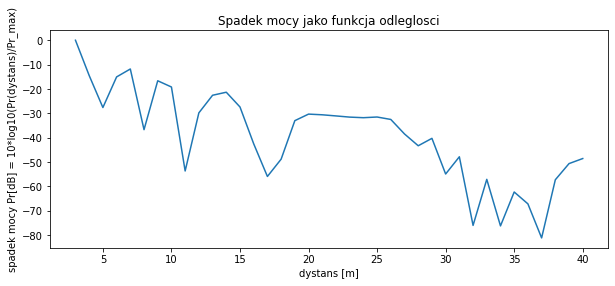

In [4]:
from cmath import exp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


#predkosc swiatla
c=3*np.power(10,8)
#wspolczynniki odbicia
a_s=-0.7
a_p=-0.9
#wspolczynniki odbicia dla konkretnych sciezek
a_d1=1
a_d2=a_p
a_d3=a_s*a_p*a_s
#czestotliwosc
f=30*np.power(10,8)
#dystans - tablica o polach z wartosciami 3, 4, ..., 40
distance_var = [e + 1 for e in range(2,40)] 
#print (distance_var)

Pr_array = []


for i in range (len(distance_var)):
    print("\ndystans = ",distance_var[i],"m")
    
    #kolejne sciezki
    d1=distance_var[i]
    d2=round(np.sqrt(np.power(4,2)+np.power(distance_var[i],2)),6)
    d3=round(np.sqrt(np.power((10+8+10+8),2)+np.power(distance_var[i],2)),6)
    print("d1 =", d1, "m  || d2 =", d2,"m  || d3 =", d3, "m")

    #tau[i]=d/c
    t1=round(d1/(3*np.power(10,8)),16)
    t2=round(d2/(3*np.power(10,8)),16)
    t3=round(d3/(3*np.power(10,8)),16)
    print("t1 =", t1, "s  || t2 =", t2,"s  || t3 =", t3, "s")

    # tau wzgledne[i]
    #~tau = t[i] - tmax
    tmax = t1
    t_rel_1=round(t1-tmax,16)
    t_rel_2=round(t2-tmax,16)
    t_rel_3=round(t3-tmax,16)
    print("t~1 =", t_rel_1, "s  || t~2 =", t_rel_2,"s  || t~3 =", t_rel_3, "s")

    #moc P[i]
    P1_P0 = round(np.power(a_d1/d1,2),6)
    P2_P0 = round(np.power(a_d2/d2,2),6)
    P3_P0 = round(np.power(a_d3/d3,2),6)
    print("P1 = P0 *", P1_P0, "|| P2 = P0 *", P2_P0,"|| P2 = P0 *", P3_P0)

    #moc wzgledna P[i]
    Pmax=P1_P0
    P_rel_1 = round(10 * np.log10(P1_P0/Pmax),6)
    P_rel_2 = round(10 * np.log10(P2_P0/Pmax),6)
    P_rel_3 = round(10 * np.log10(P3_P0/Pmax),6) 
    print("P~1 =", P_rel_1, "dB  || P~2 =", P_rel_2,"dB  || P~3 =", P_rel_3, "dB")

    Pr_P0 = np.power((a_d1/d1)+(a_d2/d2)*exp(-1j*2*np.pi*t_rel_2*f)+(a_d3/d3)*exp(-1j*2*np.pi*t_rel_3*f),2) 
    print("complex Pr = P0 *",Pr_P0)

    Pr_P0_module = round(np.power(Pr_P0.real,2) + np.power(Pr_P0.imag,2),12)
    print("module Pr = P0 *",Pr_P0_module)

    Pr_array.append(Pr_P0_module)
    """
    Pr_P0_distanceshift = np.power((a_d1/d1)+(a_d2/d2)*exp(1j*2*np.pi*(d2-d1)*f/c)+(a_d3/d3)*exp(1j*2*np.pi*(d3-d1)*f/c),2)
    print("complex distanceshift Pr = P0 *",Pr_P0_distanceshift)
    Pr_P0_dist_module = np.power(Pr_P0_distanceshift.real,2) + np.power(Pr_P0_distanceshift.imag,2)
    print("distance module Pr = P0 *",Pr_P0_dist_module)
    """

    print("="*75+"\n")

#print(Pr_array)
Prmax=Pr_array[0]
for i in range(len(Pr_array)):
    Pr_array[i]=10*np.log10(Pr_array[i]/Prmax)
    print(Pr_array[i])

# wykres
x = distance_var
y = Pr_array
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, y)
plt.xlabel("dystans [m]")
plt.ylabel("spadek mocy Pr[dB] = 10*log10(Pr(dystans)/Pr_max)")
plt.title("Spadek mocy jako funkcja odleglosci")